In [13]:
import serial
import numpy as np 
from matplotlib import pyplot as plt
import numpy_indexed as npi
%matplotlib inline

In [5]:
data = []

In [33]:
t = np.arange(0, 999, 1)

In [6]:
PORT = 0
while True:
    try:
        RGBcircuit = serial.Serial("COM"+str(PORT), baudrate=9600, timeout=1)
        break
    except:
        PORT = PORT + 1
print("PORT Connected to COM" + str(PORT))

for index in range(1000):
    try:
        tempData = list(map(int ,RGBcircuit.readline().decode()[:-1].split(", ")))
        data.append(tempData)
    
        if index % 100 == 0:
            print("Progress -> {} %".format(index / 10))

    except UnicodeDecodeError:
        pass

    except KeyboardInterrupt:
        exit()

RGBcircuit.close()

PORT Connected to COM6
Progress -> 10.0 %
Progress -> 20.0 %
Progress -> 30.0 %
Progress -> 40.0 %
Progress -> 50.0 %
Progress -> 60.0 %
Progress -> 70.0 %
Progress -> 80.0 %
Progress -> 90.0 %


In [7]:
data = np.array(data, dtype="int16")

In [8]:
average = np.mean(data, axis=1)


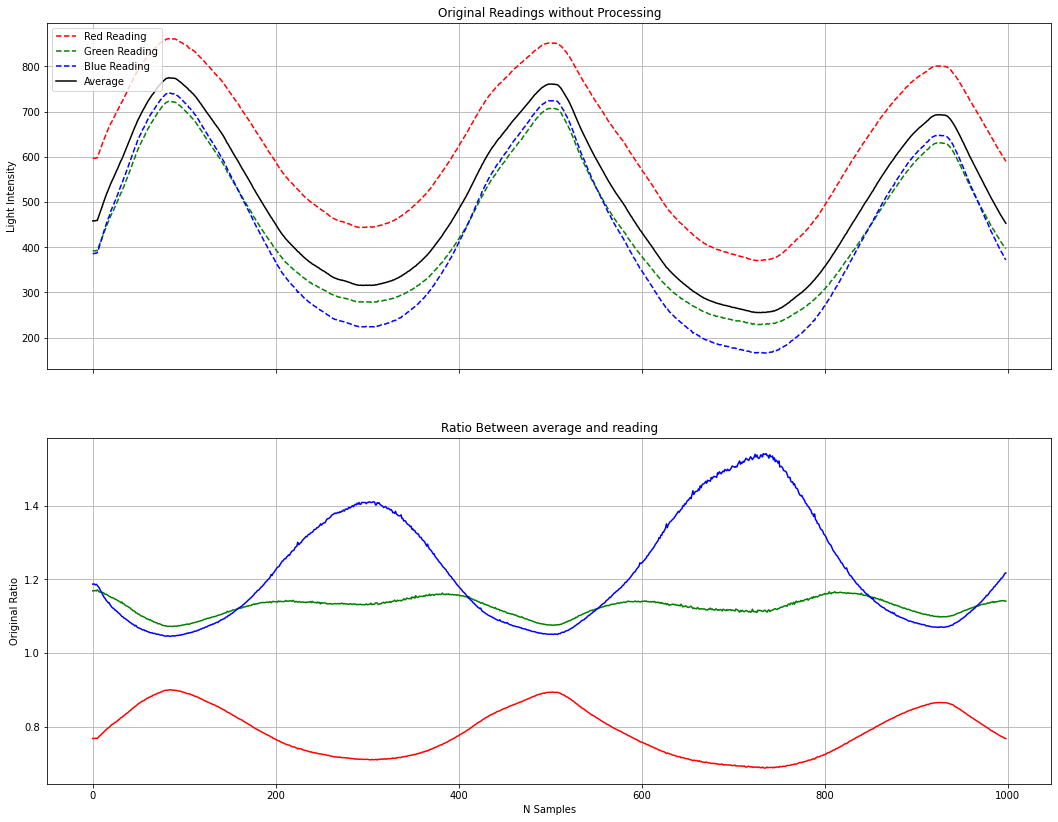

In [34]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize = (18, 14))

ax[1].set_xlabel("N Samples")

ax[0].set_title("Original Readings without Processing")
ax[0].set_ylabel("Light Intensity")
ax[0].plot(t, data[:, 0], 'r--', label="Red Reading")
ax[0].plot(t, data[:, 1], 'g--', label="Green Reading")
ax[0].plot(t, data[:, 2], 'b--', label="Blue Reading")
ax[0].plot(t, average, 'k', label="Average")
ax[0].grid()
ax[0].legend(loc = 'upper left')


ax[1].set_title("Ratio Between average and reading")
ax[1].set_ylabel("Original Ratio")
ax[1].plot(t, average / data[:, 0], 'r')
ax[1].plot(t, average / data[:, 1], 'g')
ax[1].plot(t, average / data[:, 2], 'b')
ax[1].grid()

plt.show()

In [14]:
data_copy = data.copy()

In [64]:
average = average.reshape(-1, 1).astype("int16")
result = np.hstack((data, average))

In [75]:
results=[]
for x in sorted(np.unique(result[...,3])):
    results.append([    np.average(result[np.where(result[...,3]==x)][...,0]),
                        np.average(result[np.where(result[...,3]==x)][...,1]), 
                        np.average(result[np.where(result[...,3]==x)][...,2]), 
                        x])

In [76]:
results = np.array(results)

In [99]:
results = results.astype("float64")
for i in range(3):
    results[:,i] = results[:,i] / results[:,3]

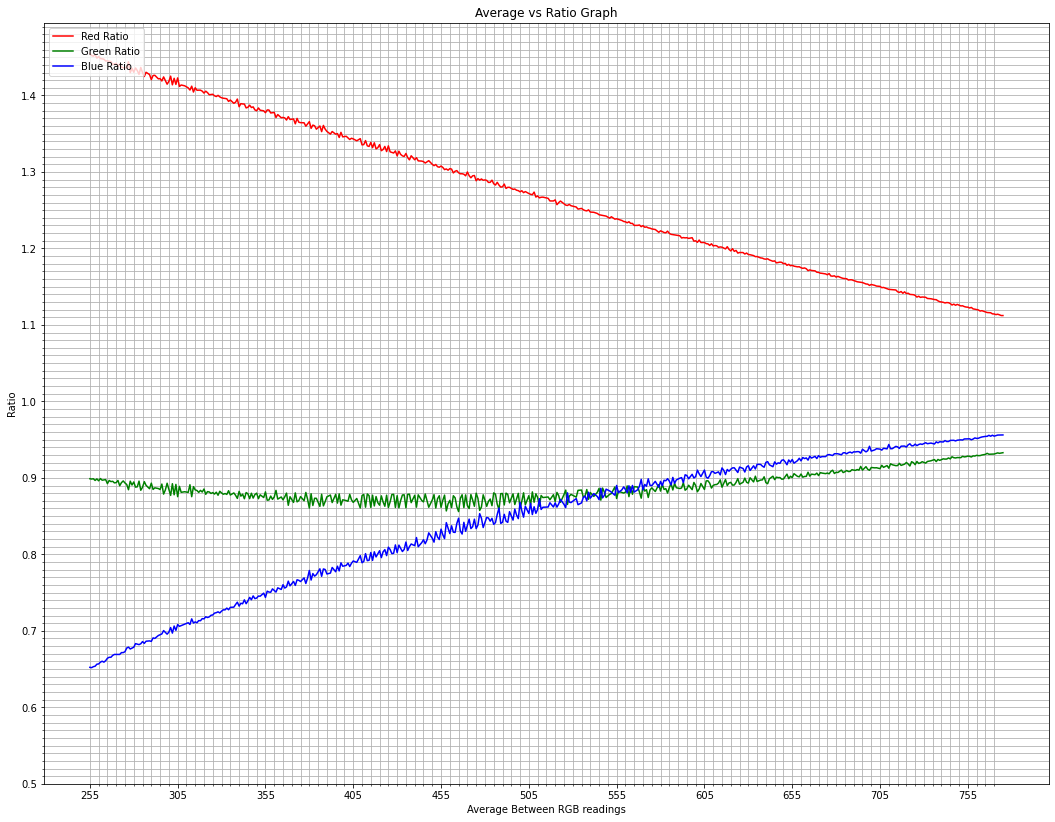

In [105]:
major_xticks = np.arange(np.min(results[:, 3]), np.max(results[:, 3]), 50)
minor_xticks = np.arange(np.min(results[:, 3]), np.max(results[:, 3]), 5)

major_yticks = np.arange(0.5, 1.5, 0.1)
minor_yticks = np.arange(0.5, 1.5, 0.01)

fig, ax = plt.subplots(1, 1, sharex=True, figsize = (18, 14))

ax.set_xlabel("Average Between RGB readings")

ax.set_title("Average vs Ratio Graph")
ax.set_ylabel("Ratio")

ax.plot(results[:, 3], results[:, 0], 'r', label="Red Ratio")
ax.plot(results[:, 3], results[:, 1], 'g', label="Green Ratio")
ax.plot(results[:, 3], results[:, 2], 'b', label="Blue Ratio")

ax.set_xticks(major_xticks)
ax.set_xticks(minor_xticks, minor=True)
ax.set_yticks(major_yticks)
ax.set_yticks(minor_yticks, minor=True)

# And a corresponding grid
ax.grid(which='both')


ax.legend(loc = 'upper left')

plt.show()

In [96]:
sample = np.array([
    [2,4,7,2],
    [5,3,2,4],
    [6,5,3,10]
], dtype="float32")

In [97]:
 for i in range(3):
    sample[:,i] = sample[:,i] / sample[:,3]

In [98]:
sample

array([[ 1.  ,  2.  ,  3.5 ,  2.  ],
       [ 1.25,  0.75,  0.5 ,  4.  ],
       [ 0.6 ,  0.5 ,  0.3 , 10.  ]], dtype=float32)